In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
path = 'D:\Courses\Fall 19\ELEG 815 Statistical Learning\HW6\Dataset'
train_data = pd.read_csv(path+'\DigitsTraining.csv',header=None)
test_data = pd.read_csv(path+'\DigitsTesting.csv',header=None)

In [3]:
def Extract_features(raw_dataset):
    len_dataset = len(raw_dataset)
    number_of_features = 2
    dataset = np.empty((len_dataset,number_of_features + 1))
    true_labels = np.empty((len_dataset,))
    for index,image_pixels in raw_dataset.iterrows():
        """---------------------- Average Intensity-------------------------"""
        avg_intensity = sum(image_pixels[1:])/len(image_pixels[1:])

        """-----------------------Average Symmetry--------------------------"""
        img = np.array(image_pixels[1:]).reshape((16,16))
        flipped_image = np.fliplr(img)
        flipped_image_pixels = flipped_image.flatten()
        image_pixels = np.array(image_pixels)
        asymmetry = sum(np.absolute(image_pixels[1:] - flipped_image_pixels))/len(image_pixels[1:])
        symmetry = 1 - asymmetry
        dataset[index][0] = 1
        dataset[index][1] = 1 - avg_intensity           # Higher value of intensity means there are more white pixels than black pixels because white = 255 and black = 0
        dataset[index][2] = symmetry
        if int(image_pixels[0]) == 1:                   # Suppose digit 1 has label = -1
            true_labels[index] = -1
        else:
            true_labels[index] = 1                      # Suppose all other digits have label = +1
    return dataset,true_labels
d_3_train_dataset,d_3_train_labels = Extract_features(train_data)
d_3_test_dataset,d_3_test_labels = Extract_features(test_data)
print(d_3_train_dataset.shape)

(7291, 3)


In [4]:
def Non_Linear_Transform(existing_dataset):
    new_dataset = np.empty((len(existing_dataset),existing_dataset.shape[1]+7))
    new_dataset[:,:3] = existing_dataset
    for i in range(len(existing_dataset)):
        new_dataset[i][3] = existing_dataset[i][1]**2
        new_dataset[i][4] = existing_dataset[i][1]*existing_dataset[i][2]
        new_dataset[i][5] = existing_dataset[i][2]**2
        new_dataset[i][6] = existing_dataset[i][1]**3
        new_dataset[i][7] = existing_dataset[i][1]**2 * existing_dataset[i][2]
        new_dataset[i][8] = existing_dataset[i][1] * existing_dataset[i][2]**2
        new_dataset[i][9] = existing_dataset[i][2]**3
    return new_dataset

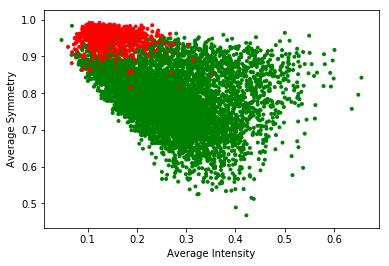

In [5]:
def Set_Colors_Array(true_labels):
    col = [None]*len(true_labels)
    for i in range(len(true_labels)):
        if int(true_labels[i]) == -1:
            col[i] = 'r'
        else:
            col[i] = 'g'
    return col
colors = Set_Colors_Array(d_3_train_labels)
def Scatter_Plot(dataset,colors):           # Red = digit 2 and Green = digit 1
    x = dataset[:,1]
    y = dataset[:,2]
    plt.scatter(x,y,c= colors,marker='.')
    plt.xlabel('Average Intensity')
    plt.ylabel('Average Symmetry')
    plt.show()
Scatter_Plot(d_3_train_dataset,colors)

In [6]:
def Linear_Regression(X,Y):
    XTranspose_X_Inv = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)
    return np.dot(XTranspose_X_Inv,Y)
W_d_3 = Linear_Regression(d_3_train_dataset,d_3_train_labels)
print(W_d_3)

[ 3.47191964  1.71570424 -3.95154749]


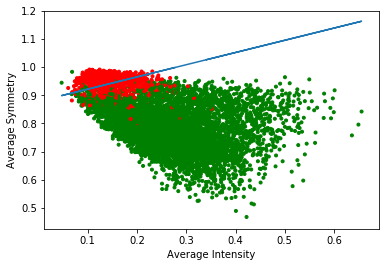

In [7]:
def Plot_Results(dataset,colors,W):
    x = dataset[:,1]
    y = dataset[:,2]
    plt.scatter(x,y,c= colors,marker='.')
    plt.xlabel('Average Intensity')
    plt.ylabel('Average Symmetry')
    #plt.title('Linear Regression Boundary for Digits 1 and '+str(digit))
    X = dataset
    Y = [0]*len(X)
    for i in range(len(X)):
       Y[i] = (-W[0]*X[i][0]- W[1]*X[i][1])/W[2]
    plt.plot(x,Y)
Plot_Results(d_3_train_dataset,colors,W_d_3)

# (a)
#Error of Training Data with 3 dimensional data : 5.897682073789603
#Error of Test Data with 3 dimensional data : 6.078724464374688

In [8]:
def Error(dataset,true_labels,W):
    count = 0
    for index,point in enumerate(dataset):
        if np.sign(np.dot(W.T,point)) != true_labels[index]:
            count += 1
    return (count/len(dataset))*100
print('Error of Training Data with 3 dimensional data :',Error(d_3_train_dataset,d_3_train_labels,W_d_3))
print('Error of Test Data with 3 dimensional data :',Error(d_3_test_dataset,d_3_test_labels,W_d_3))

Error of Training Data with 3 dimensional data : 5.897682073789603
Error of Test Data with 3 dimensional data : 6.078724464374688


# (b)
#Error of Training Data with 10 dimensional data : 3.2368673707310385
#Error of Test Data with 10 dimensional data : 3.537618335824614

In [9]:
d_10_train_dataset = Non_Linear_Transform(d_3_train_dataset)
d_10_train_labels = d_3_train_labels
d_10_test_dataset = Non_Linear_Transform(d_3_test_dataset)
d_10_test_labels = d_3_test_labels

In [10]:
W_d_10 = Linear_Regression(d_10_train_dataset,d_10_train_labels)
print('Error of Training Data with 10 dimensional data :',Error(d_10_train_dataset,d_10_train_labels,W_d_10))
print('Error of Test Data with 10 dimensional data :',Error(d_10_test_dataset,d_10_test_labels,W_d_10))

Error of Training Data with 10 dimensional data : 3.2368673707310385
Error of Test Data with 10 dimensional data : 3.537618335824614


# (c)
E_in and E_out of the transformed data are less than with original data. It means that the cubic transofrmation fits the data well both in and out of sample. The data points become more sparse/far away from each other in transformed Z space which results in lower in sample error and a better hypothesis which results in better generalization(we can see lower error on testing data). This is more clear in the graph below.

# (d) Plots as in Slide 14 "Nonlinear Transformation"

'-----Below plotted contour was a straight line in Z space, but is a cubic polynomial in original X space------'

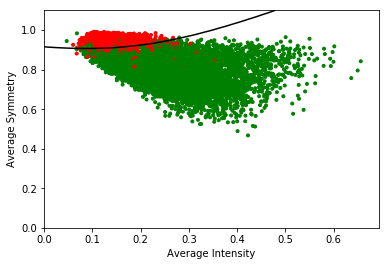

In [18]:
def Plot_Results(dataset,colors,W):
    #print(W)
    x = dataset[:,1]
    y = dataset[:,2]
    plt.scatter(x,y,c= colors,marker='.')
    plt.xlabel('Average Intensity')
    plt.ylabel('Average Symmetry')
    #plt.title('Linear Regression Boundary for Digits 1 and '+str(digit))
    x_values = np.linspace(0,0.6)
    y_values = np.linspace(0,1.1)
    """https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy"""
    # Meshgrid creates rectangular grid with x axis steps defined by x array and y axis grid steps defined by y array
    x_grid,y_grid = np.meshgrid(x_values,y_values)

    function = W[0] + W[1]*x_grid + W[2]*y_grid + W[3]*x_grid**2 + W[4]*x_grid*y_grid + W[5]*y_grid**2 + W[6]*x_grid**3 + W[7]*x_grid**2*y_grid + W[8]*x_grid*y_grid**2 + W[9]*y_grid**3
    plt.contour(x_values,y_values,function,[0],colors='k',linestyles='solid')
Plot_Results(d_10_train_dataset,colors,W_d_10)

"""-----Below plotted contour was a straight line in Z space, but is a cubic polynomial in original X space------"""
# Had we used a 5th order transformation, then it would again have been a straight line
# in Z space but a wiggly 5th order polynomial in X space because we use linear classification
# in Z space i.e w_tilda = sign(W.T*Z)